In [ ]:
#importing dataset

import pandas as pd

df = pd.read_excel("/content/owid-covid-data.xlsx")

In [ ]:
#Selecting the required columns

df = df[["location","date","total_cases"]]

In [ ]:
#Filtering the country: India

df['location'] = df['location'].where(df['location'] == "India")

In [ ]:
#Dropping null values

df = df.dropna()
df

,location,date,total_cases
35103,India,2020-01-30,1.0
35104,India,2020-01-31,1.0
35105,India,2020-02-01,1.0
35106,India,2020-02-02,2.0
35107,India,2020-02-03,3.0
...,...,...,...
35556,India,2021-04-27,17997113.0
35557,India,2021-04-28,18376421.0
35558,India,2021-04-29,18762976.0
35559,India,2021-04-30,19164969.0


In [ ]:
#Dropping location column

df = df.drop(["location"], axis=1)
df

,date,total_cases
35103,2020-01-30,1.0
35104,2020-01-31,1.0
35105,2020-02-01,1.0
35106,2020-02-02,2.0
35107,2020-02-03,3.0
...,...,...
35556,2021-04-27,17997113.0
35557,2021-04-28,18376421.0
35558,2021-04-29,18762976.0
35559,2021-04-30,19164969.0


In [ ]:
#Renaming columns

df = df.rename(columns = {"date" : "ds",
                          "total_cases" : "y"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 35103 to 35560
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      458 non-null    object 
 1   y       458 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.7+ KB


In [ ]:
#Converting data types

import pandas as pd
 
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = df['y'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 35103 to 35560
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      458 non-null    datetime64[ns]
 1   y       458 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.7 KB


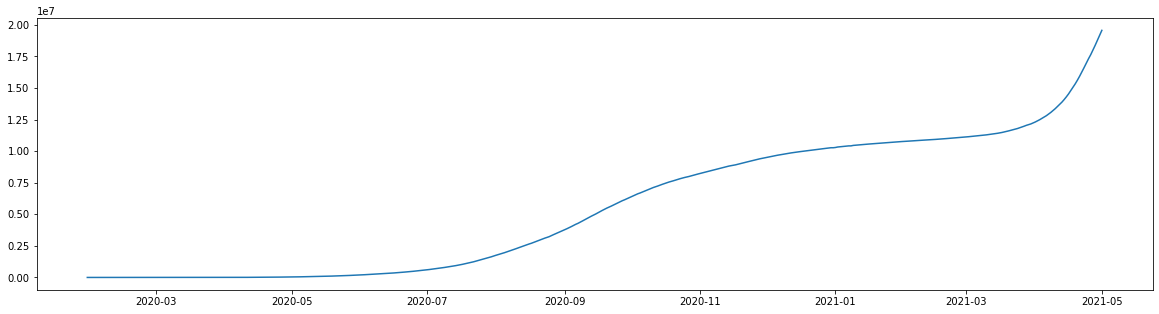

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))    
plt.plot(df['ds'],df['y'])
plt.show()

In [ ]:
#Forecasting

from fbprophet import Prophet

model = Prophet(changepoint_prior_scale=0.07)
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


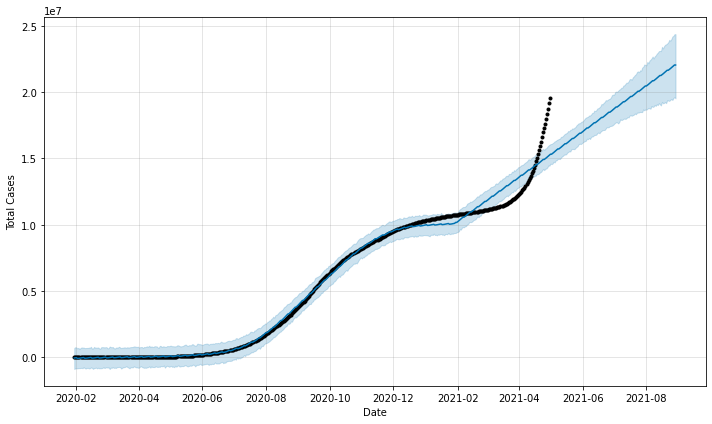

In [ ]:
forecast = model.make_future_dataframe(periods = 120 , freq = "D")
forecast = model.predict(forecast)
model.plot(forecast , xlabel="Date" , ylabel = "Total Cases");

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,-5.645366e+04,-8.878962e+05,7.016739e+05
1,2020-01-31,-4.263897e+04,-8.305266e+05,7.618684e+05
2,2020-02-01,-2.854566e+04,-8.364558e+05,7.408275e+05
3,2020-02-02,-8.575434e+04,-8.364727e+05,6.691895e+05
4,2020-02-03,-8.203438e+04,-8.110417e+05,7.133844e+05
...,...,...,...,...
573,2021-08-25,2.184451e+07,1.947957e+07,2.401246e+07
574,2021-08-26,2.191371e+07,1.940804e+07,2.420186e+07
575,2021-08-27,2.198266e+07,1.956817e+07,2.424934e+07
576,2021-08-28,2.205188e+07,1.961811e+07,2.437859e+07


In [ ]:
#Evaluation

from sklearn.metrics import mean_squared_error,r2_score

print(mean_squared_error(forecast.loc[0:457,'yhat'],df['y']))
print(r2_score(forecast.loc[0:457,'yhat'],df['y']))

353899918247.7658
0.9864553848704031
